In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Modeling 

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor

import warnings


In [50]:
df = pd.read_csv('data\stud.csv')

In [51]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y variables 

In [52]:
X = df.drop(columns=['math_score'], axis=1)


In [53]:
y=df['math_score']

In [54]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [55]:
# Create Columns transformer with 3 types of transformers 

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
[
    ('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScaler' , numeric_transformer,num_features)
]
)




In [56]:
X = preprocessor.fit_transform(X)

In [57]:
X.shape

(1000, 19)

In [58]:
X_train, X_test , y_train, y_test = train_test_split(X , y , test_size=0.25 , random_state=1 )

X_train.shape , X_test.shape

((750, 19), (250, 19))

## Create and Evaluate Function to give all metrics afeter model Training 

In [59]:
def evaluate_model (true,predicted): 
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse, r2_square


In [60]:
models ={
"Linear Regression" : LinearRegression(),
"Lasso" : Lasso(),
"Ridge" : Ridge(),
"K-Neighbors Regressor" : KNeighborsRegressor(),
"Decision Tree" : DecisionTreeRegressor(),
"Random Forest Regressor" : RandomForestRegressor(),
"XGBRegressor" : XGBRegressor(),
"CatBoostRegressor" : CatBoostRegressor(verbose=False),
"AdaBoost Regressor" : AdaBoostRegressor()
}


In [69]:
model_list= []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model 

    #Make predictions 

    y_trian_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Train and Test dataet 

    model_train_mae , model_train_mse ,model_train_rmse , model_train_r2 = evaluate_model(y_train, y_trian_pred)
    model_test_mae ,  model_train_mse ,model_test_rmse , model_test_r2 = evaluate_model(y_test , y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)


    print("Model performanc for Training set")
    print(" - Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_train_mae))
    print(" - R2 Score: {:4f}".format(model_train_r2))

    print("------------------------------------------")

    print("Model performance fot Test set")
    print(" - Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" - R2 Score: {:4f}".format(model_test_r2))

    print("="*35)
    print("\n")




Linear Regression
Model performanc for Training set
 - Root Mean Squared Error: 5.4145
 - Mean Absolute Error: 4.3336
 - R2 Score: 0.871328
------------------------------------------
Model performance fot Test set
 - Root Mean Squared Error: 5.1558
 - Mean Absolute Error: 4.0613
 - R2 Score: 0.886704


Lasso
Model performanc for Training set
 - Root Mean Squared Error: 6.6400
 - Mean Absolute Error: 5.2623
 - R2 Score: 0.806495
------------------------------------------
Model performance fot Test set
 - Root Mean Squared Error: 6.3516
 - Mean Absolute Error: 4.9835
 - R2 Score: 0.828056


Ridge
Model performanc for Training set
 - Root Mean Squared Error: 5.3931
 - Mean Absolute Error: 4.3137
 - R2 Score: 0.872346
------------------------------------------
Model performance fot Test set
 - Root Mean Squared Error: 5.1508
 - Mean Absolute Error: 4.0694
 - R2 Score: 0.886923


K-Neighbors Regressor
Model performanc for Training set
 - Root Mean Squared Error: 5.9734
 - Mean Absolute Erro

In [71]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=["Model Name" , "R2_Score"]).sort_values(by = ["R2_Score"] , ascending=False)

,Model Name,R2_Score
2,Ridge,0.886923
0,Linear Regression,0.886704
7,CatBoostRegressor,0.864210
5,Random Forest Regressor,0.852776
8,AdaBoost Regressor,0.842859
6,XGBRegressor,0.838085
1,Lasso,0.828056
3,K-Neighbors Regressor,0.802555
4,Decision Tree,0.744463


## Linear Regression

In [72]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100

print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.67


## Plot y_pred and y_test

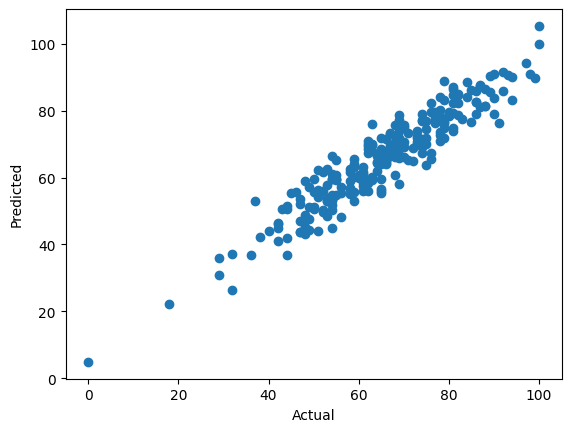

In [74]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

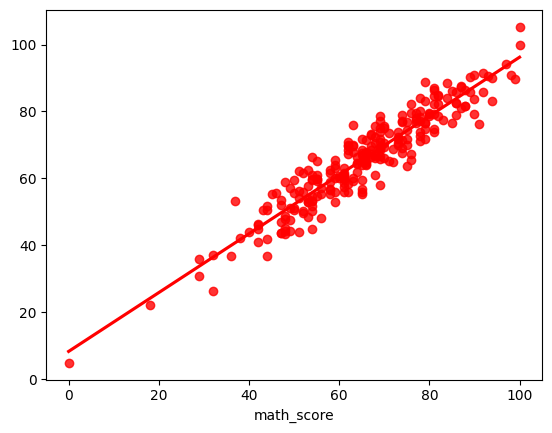

In [75]:
sns.regplot(x=y_test , y=y_pred , ci=None , color='red')

## Difference between Actual and Predicted Values

In [76]:
pred_df = pd.DataFrame({'Actual Value' : y_test , 'Predicted Value' : y_pred , 'Difference' : y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
507,55,59.6875,-4.6875
818,60,60.0000,0.0000
452,65,64.0625,0.9375
368,44,50.4375,-6.4375
242,56,48.0625,7.9375
...,...,...,...
385,67,72.9375,-5.9375
890,86,82.6250,3.3750
439,89,85.6875,3.3125
135,58,56.4375,1.5625
